In [1]:

%matplotlib inline
import pandas as pd
import itertools

from matplotlib import pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

datatypelist=[]
f1="/Users/irffanalahi/Research/Research_update/Erin/test13ctref/ontothealthy/compare/cfDNA_cw13ct_hypo_top150dmr_t1_0.15_t2_0.15_mincpg2_results_transposedtomyversion.txt"
df1=pd.read_csv(f1,sep="\t")
tmpdata='New healthy'
df1['data']=tmpdata
datatypelist.append(tmpdata)

f2="/Users/irffanalahi/Research/Research_update/Erin/test13ctref/ontothealthy/compare/ref13ct_mincpg2_q0.5_q0.01_diff0.05_hypo_top150dmr_t1_0.15_t2_0.15.txt_result_nocov_mincpg2_ABSreadcount_divisioned.txt_CSxOut_healthy.txt"
df2=pd.read_csv(f2,sep="\t")
tmpdata='Previous healthy'
df2['data']=tmpdata
datatypelist.append(tmpdata)

f3="/Users/irffanalahi/Research/Research_update/Erin/test13ctref/ontothealthy/compare/ref13ct_mincpg2_q0.5_q0.01_diff0.05_hypo_top150dmr_t1_0.15_t2_0.15.txt_result_nocov_mincpg2_ABSreadcount_divisioned.txt_CSxOut_4good_2prevcfd.txt"
df3=pd.read_csv(f3,sep="\t")
tmpdata='CRC'
df3['data']=tmpdata
datatypelist.append(tmpdata)


outputfile=f3

dflist=[df1,df2,df3] ###########


valuevars=['cB','CD4','CD8','iDC','M0','M1','M2','mDC','Mn','mNeu','nB','NK','PC']

#valuevars=['Plasma vol. (ml)','cfDNA amount (ng)','cfDNA amount (ng/ml)','Total cfDNA amt (ng) including previous extractions','Bioanalyzer 70bp-450bp percentage']#	'Indexing PCR cycles'	Final Lib. Conc. (ng/ul)	Elution vol. (ul)	Total amount of Lib (ng)

In [2]:

alldf = pd.concat(dflist)
alldf.head()

,Mixture,cB,CD4,CD8,iDC,M0,M1,M2,mDC,Mn,mNeu,nB,NK,PC,data
0,NU41,0.024540,0.112474,0.050993,0.188153,0.027888,0.137778,0.039031,0.189055,0.069506,0.250000,0.054404,0.060877,0.033593,New healthy
1,NU47,0.026638,0.070681,0.036010,0.236111,0.054795,0.163158,0.048354,0.155844,0.099243,0.378855,0.036364,0.037241,0.030837,New healthy
2,NU46,0.024831,0.058337,0.028220,0.220264,0.068966,0.207101,0.043169,0.168539,0.095098,0.431472,0.044863,0.037297,0.033953,New healthy
3,NU45,0.027679,0.076243,0.033086,0.222591,0.183908,0.159624,0.055708,0.162996,0.080159,0.313072,0.034850,0.037867,0.033202,New healthy
4,NU44,0.031646,0.076821,0.030675,0.216216,0.030000,0.088398,0.059467,0.177143,0.096018,0.289200,0.044068,0.042546,0.051790,New healthy


In [3]:
mdf = pd.melt(alldf, id_vars=['data'], value_vars=valuevars)
print(mdf)

            data variable     value
0    New healthy       cB  0.024540
1    New healthy       cB  0.026638
2    New healthy       cB  0.024831
3    New healthy       cB  0.027679
4    New healthy       cB  0.031646
..           ...      ...       ...
333          CRC       PC  0.052797
334          CRC       PC  0.121594
335          CRC       PC  0.028702
336          CRC       PC  0.126471
337          CRC       PC  0.069892

[338 rows x 3 columns]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cB_New healthy v.s. cB_Previous healthy: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.789e-02 U_stat=1.900e+01


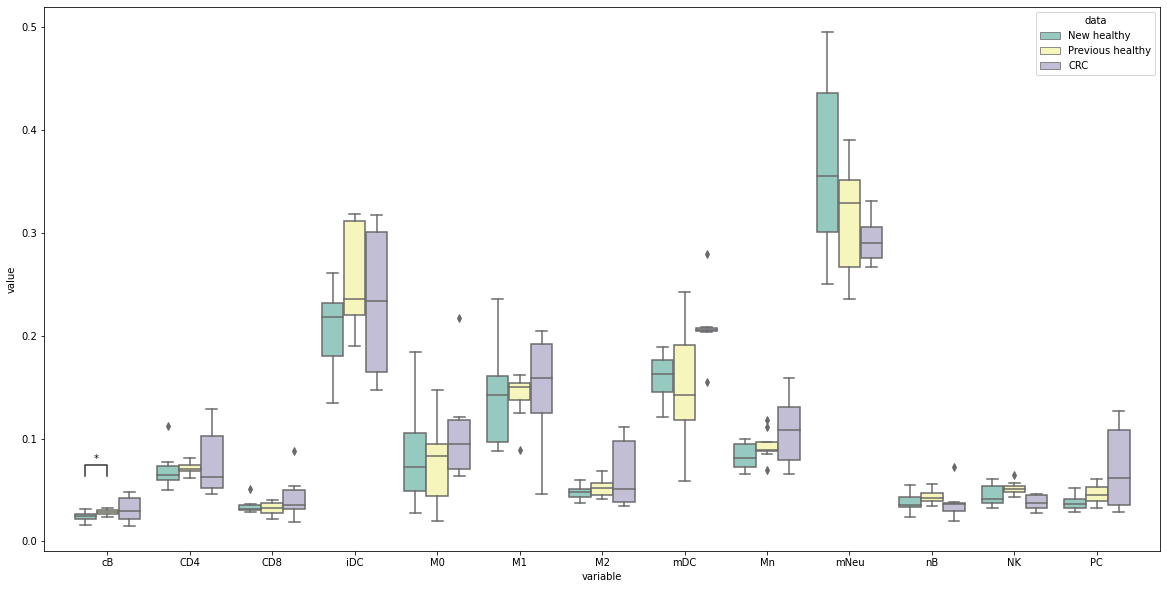

In [4]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", hue="data", data=mdf,palette="Set3") 

Box_pairs=[(("cB","New healthy"),("cB","Previous healthy"))]
test_results = add_stat_annotation(ax,data=mdf, x="variable", y="value", hue="data",box_pairs=Box_pairs,
                                   test='Mann-Whitney', text_format='star')

plt.show()

#ax.figure.savefig(outputfile+".pdf",dpi=300, bbox_inches='tight')
#plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')